https://www.kaggle.com/statsbymichaellopez/nfl-tracking-wrangling-voronoi-and-sonars

In [1]:
# options
options(repr.plot.width=12, repr.plot.height=8, warn = -1)
options(repr.matrix.max.rows=600, repr.matrix.max.cols=200)
options(scipen=999)

# libraries
suppressMessages(library(janitor))
suppressMessages(library(tidyverse))

In [2]:
train <- read_csv("../data/train.csv", col_types = cols())

In [3]:
# clean data
train <- train %>%
    mutate(ToLeft = PlayDirection == "left",
           IsBallCarrier = NflId == NflIdRusher)

In [4]:
# correcting team names
train$VisitorTeamAbbr[train$VisitorTeamAbbr == "ARI"] <- "ARZ"
train$HomeTeamAbbr[train$HomeTeamAbbr == "ARI"] <- "ARZ"

train$VisitorTeamAbbr[train$VisitorTeamAbbr == "BAL"] <- "BLT"
train$HomeTeamAbbr[train$HomeTeamAbbr == "BAL"] <- "BLT"

train$VisitorTeamAbbr[train$VisitorTeamAbbr == "CLE"] <- "CLV"
train$HomeTeamAbbr[train$HomeTeamAbbr == "CLE"] <- "CLV"

train$VisitorTeamAbbr[train$VisitorTeamAbbr == "HOU"] <- "HST"
train$HomeTeamAbbr[train$HomeTeamAbbr == "HOU"] <- "HST"

Review what 6 random plays look like.

In [5]:
set.seed(200)

sample_plays <- train %>%
    select(PlayId, ToLeft) %>%
    group_by(ToLeft) %>%
    sample_n(3)

(sample_plays)

PlayId,ToLeft
<dbl>,<lgl>
20171210092230,FALSE
20181021000240,FALSE
20181028062743,FALSE
20181118024118,TRUE
20171120000963,TRUE
20171217020290,TRUE


In [6]:
sample_chart_v1 <- sample_plays %>%
    inner_join(train)

head(sample_chart_v1)

Joining, by = c("PlayId", "ToLeft")


PlayId,ToLeft,GameId,Team,X,Y,S,A,Dis,Orientation,Dir,NflId,DisplayName,JerseyNumber,Season,YardLine,Quarter,GameClock,PossessionTeam,Down,Distance,FieldPosition,HomeScoreBeforePlay,VisitorScoreBeforePlay,NflIdRusher,OffenseFormation,OffensePersonnel,DefendersInTheBox,DefensePersonnel,PlayDirection,TimeHandoff,TimeSnap,Yards,PlayerHeight,PlayerWeight,PlayerBirthDate,PlayerCollegeName,Position,HomeTeamAbbr,VisitorTeamAbbr,Week,Stadium,Location,StadiumType,Turf,GameWeather,Temperature,Humidity,WindSpeed,WindDirection,IsBallCarrier
<dbl>,<lgl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<time>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dttm>,<dttm>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<lgl>
20171210092230,FALSE,2017121009,away,108.76,28.03,0.90,0.21,0.17,93.64,287.26,2495490,Muhammad Wilkerson,96,2017,1,3,07:41:00,DEN,1,1,NYJ,13,0,2540269,JUMBO,"6 OL, 2 RB, 2 TE, 0 WR",10,"4 DL, 4 LB, 3 DB",right,2017-12-10 22:47:31,2017-12-10 22:47:30,0,6-4,315,10/22/1989,Temple,DE,DEN,NYJ,14,Sports Authority Field at Mile High,"Denver, CO",Outdoor,Grass,Sunny,60,8,3,North,FALSE
20171210092230,FALSE,2017121009,away,106.56,30.80,1.54,2.06,0.17,49.73,276.30,2507590,Steve McLendon,99,2017,1,3,07:41:00,DEN,1,1,NYJ,13,0,2540269,JUMBO,"6 OL, 2 RB, 2 TE, 0 WR",10,"4 DL, 4 LB, 3 DB",right,2017-12-10 22:47:31,2017-12-10 22:47:30,0,6-3,310,01/03/1986,Troy,NT,DEN,NYJ,14,Sports Authority Field at Mile High,"Denver, CO",Outdoor,Grass,Sunny,60,8,3,North,FALSE
20171210092230,FALSE,2017121009,away,112.61,27.44,1.59,0.35,0.16,205.17,266.69,2533008,Demario Davis,56,2017,1,3,07:41:00,DEN,1,1,NYJ,13,0,2540269,JUMBO,"6 OL, 2 RB, 2 TE, 0 WR",10,"4 DL, 4 LB, 3 DB",right,2017-12-10 22:47:31,2017-12-10 22:47:30,0,6-2,248,01/11/1989,Arkansas State,ILB,DEN,NYJ,14,Sports Authority Field at Mile High,"Denver, CO",Outdoor,Grass,Sunny,60,8,3,North,FALSE
20171210092230,FALSE,2017121009,away,109.31,27.00,1.18,0.50,0.12,227.92,317.39,2540277,David Bass,47,2017,1,3,07:41:00,DEN,1,1,NYJ,13,0,2540269,JUMBO,"6 OL, 2 RB, 2 TE, 0 WR",10,"4 DL, 4 LB, 3 DB",right,2017-12-10 22:47:31,2017-12-10 22:47:30,0,6-4,267,09/11/1990,Missouri Western State,OLB,DEN,NYJ,14,Sports Authority Field at Mile High,"Denver, CO",Outdoor,Grass,Sunny,60,8,3,North,FALSE
20171210092230,FALSE,2017121009,away,108.75,34.72,4.66,1.86,0.56,107.45,188.72,2540287,Rontez Miles,45,2017,1,3,07:41:00,DEN,1,1,NYJ,13,0,2540269,JUMBO,"6 OL, 2 RB, 2 TE, 0 WR",10,"4 DL, 4 LB, 3 DB",right,2017-12-10 22:47:31,2017-12-10 22:47:30,0,6-0,203,11/25/1988,"California, Pa.",FS,DEN,NYJ,14,Sports Authority Field at Mile High,"Denver, CO",Outdoor,Grass,Sunny,60,8,3,North,FALSE
20171210092230,FALSE,2017121009,away,110.53,32.40,1.83,0.45,0.19,147.92,160.78,2541864,Josh Martin,95,2017,1,3,07:41:00,DEN,1,1,NYJ,13,0,2540269,JUMBO,"6 OL, 2 RB, 2 TE, 0 WR",10,"4 DL, 4 LB, 3 DB",right,2017-12-10 22:47:31,2017-12-10 22:47:30,0,6-3,245,11/07/1991,Columbia,OLB,DEN,NYJ,14,Sports Authority Field at Mile High,"Denver, CO",Outdoor,Grass,Sunny,60,8,3,North,FALSE


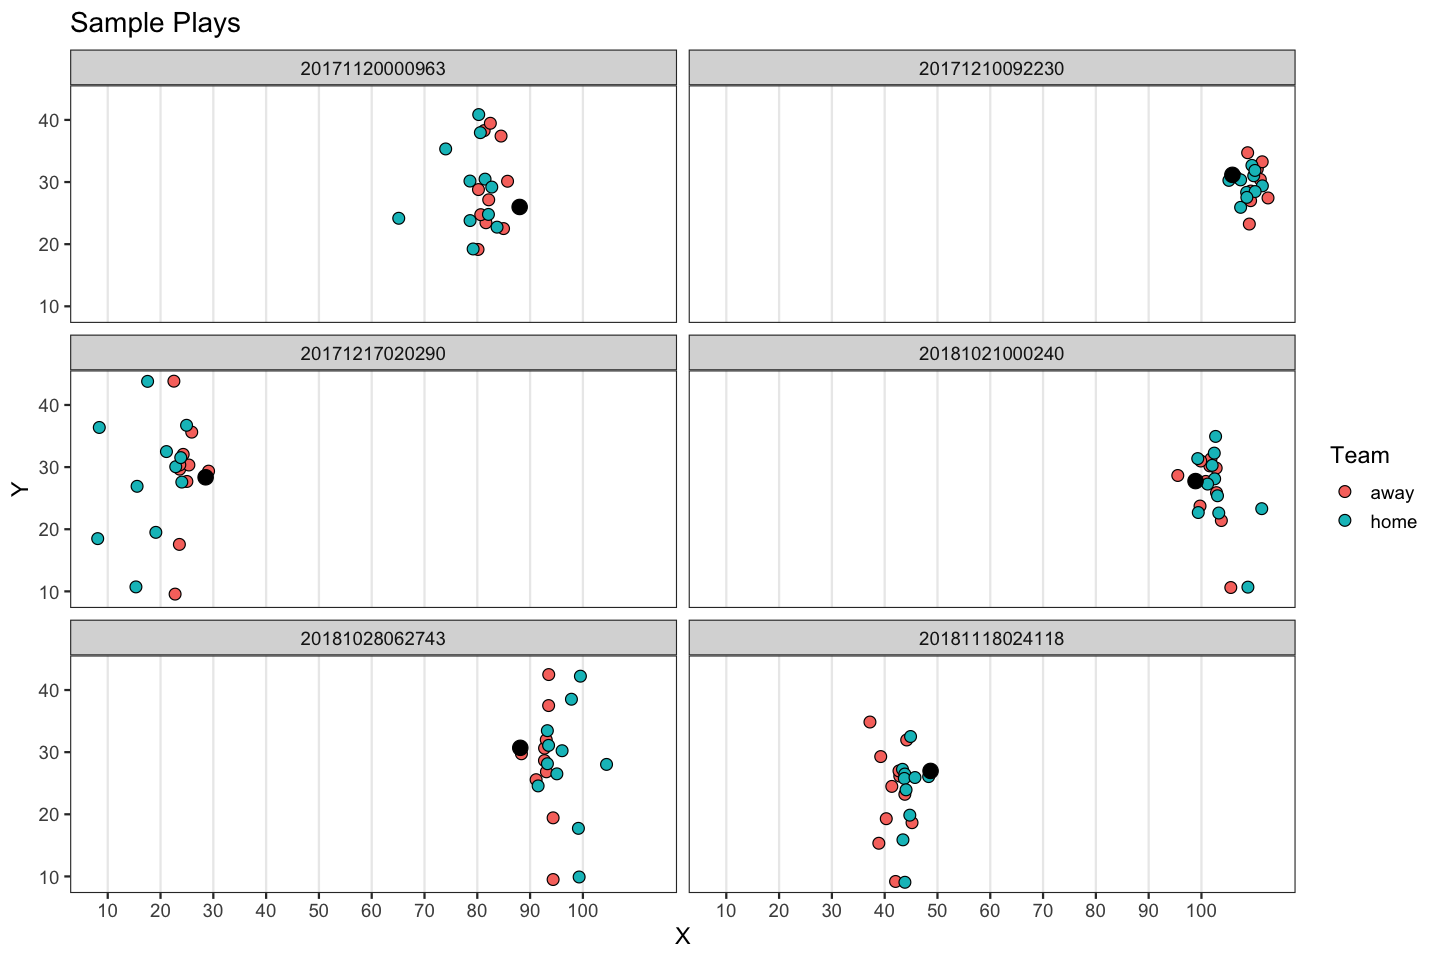

In [7]:
sample_chart_v1 %>%
    ggplot(aes(x = X, y = Y, fill = Team)) +
        geom_point(pch = 21, size = 3) +
        geom_point(data = filter(sample_chart_v1, IsBallCarrier), size = 4, pch = 21, fill = "black") +
        scale_colour_brewer(palette = "Set2") +
        scale_x_continuous(breaks = (c(0:10)*10)) + 
        labs(x = "X", y = "Y", title = "Sample Plays") +
        theme_bw(14) +
        theme(panel.grid.minor = element_blank(),
              panel.grid.major.y = element_blank()) +
        facet_wrap(~PlayId, nrow = 3)

It is hard to tell who is on offense, and which way each team is going. We will standardize the data such that:

- offensive team is always moving left to right

In [8]:
train_clean <- train %>%
    mutate(team_on_offense = ifelse(HomeTeamAbbr == PossessionTeam, "home", "away"),
           is_on_offense = Team == team_on_offense, # is player on offense
           yards_from_own_goal = ifelse(as.character(FieldPosition) == PossessionTeam,
                                        YardLine, 50 + (50-YardLine)),
           yards_from_own_goal = ifelse(YardLine == 50, 50, yards_from_own_goal),
           X_std = ifelse(ToLeft, 120-X, X) - 10,
           Y_std = ifelse(ToLeft, 160/3-Y, Y))

Plot the results...

Joining, by = c("PlayId", "ToLeft")


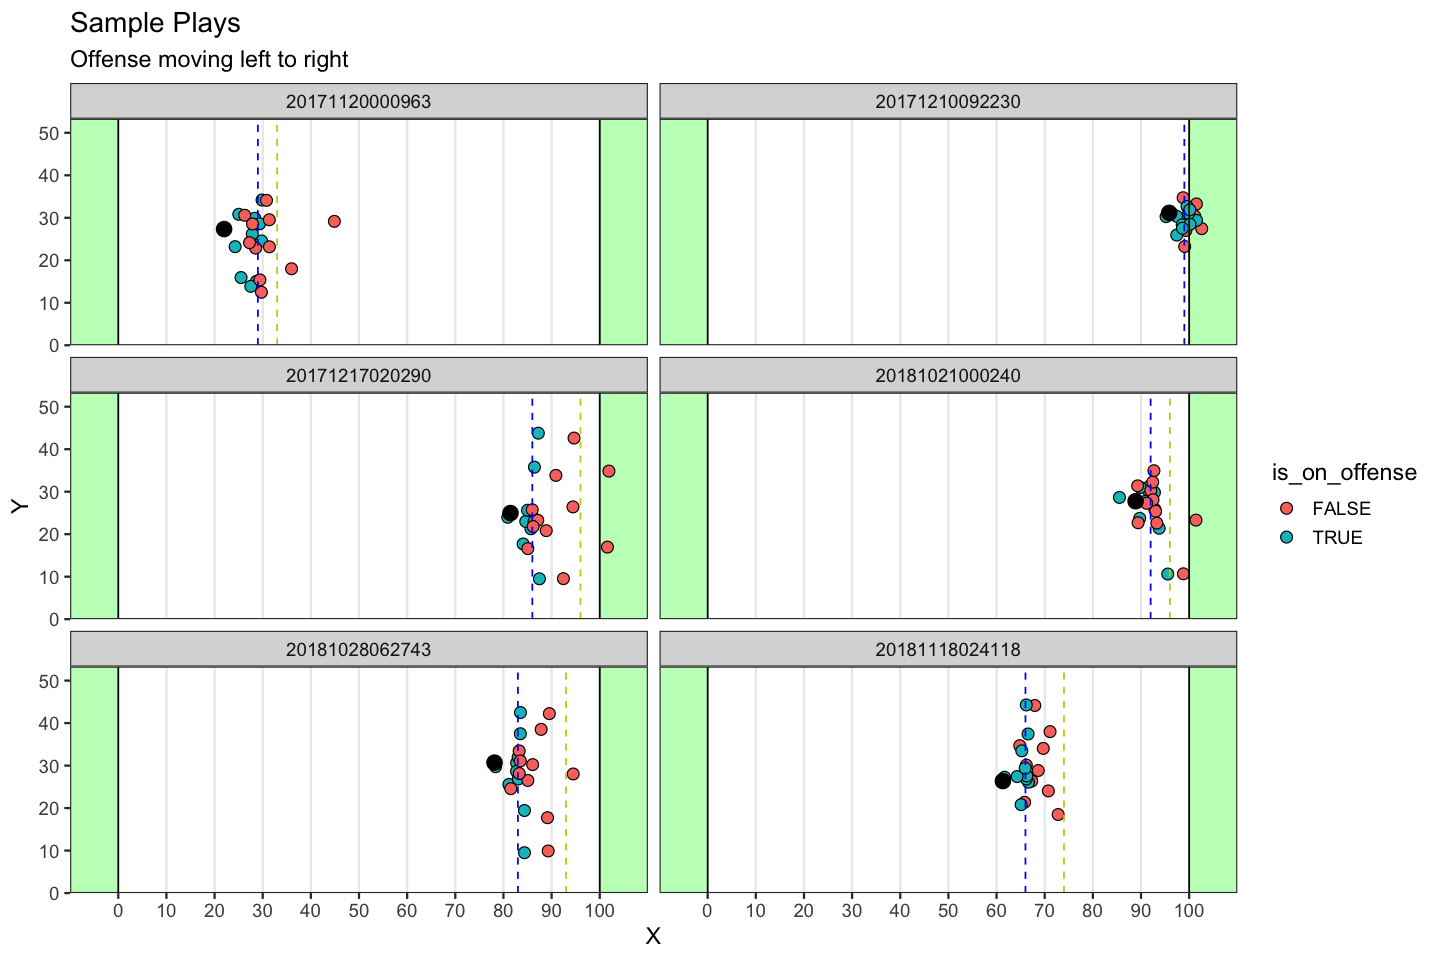

In [9]:
sample_chart_v2 <- sample_plays %>%
    inner_join(train_clean)

sample_chart_v2 %>%
    ggplot(aes(x = X_std, y = Y_std, fill = is_on_offense))  +
        # draw endzones
        geom_rect(aes(xmin = -10, xmax = 0, ymin = 0, max = Inf), fill = "darkseagreen1") +
        geom_rect(aes(xmin = 100, xmax = 110, ymin = 0, max = Inf), fill = "darkseagreen1") +
        # draw players
        geom_point(pch = 21, size = 3) +
        geom_point(data = filter(sample_chart_v2, IsBallCarrier), size = 4, pch = 21, fill = "black") +
        # draw lines
        geom_vline(aes(xintercept = yards_from_own_goal), colour = "blue", lty = 2) +
        geom_vline(aes(xintercept = yards_from_own_goal + Distance), colour = "yellow3", lty = 2) +
        geom_vline(aes(xintercept = 0)) +
        geom_vline(aes(xintercept = 100)) +
        # settings
        scale_colour_brewer(palette = "Set2") +
        scale_x_continuous(breaks = (c(0:10)*10), limits = c(-10, 110), expand = c(0,0)) + 
        scale_y_continuous(limits = c(0, 53.3), expand = c(0,0)) +
        labs(x = "X", y = "Y", title = "Sample Plays", subtitle = "Offense moving left to right") +
        theme_bw(14) +
        theme(panel.grid.minor = element_blank(),
              panel.grid.major.y = element_blank()) +
        facet_wrap(~PlayId, nrow = 3)

In [14]:
#' Plot football field
#'
#' @param play_ids a vector of PlayIds to plot
#'
#' @return faceted ggplot of selected plays
#'
#' @examples
plot_field <- function(play_ids) {
  num_plays <- length(play_ids)
  facet_rows <- ifelse(num_plays == 1, 1, ceiling(num_plays / 2))
  facet_cols <- ifelse(num_plays == 1, 1, 2)

  df <- train_clean %>%
    filter(PlayId %in% play_ids)

  df %>%
    ggplot(aes(x = X_std, y = Y_std, fill = is_on_offense)) +
    # draw endzones
    geom_rect(aes(xmin = -10, xmax = 0, ymin = 0, max = Inf), fill = "darkseagreen1") +
    geom_rect(aes(xmin = 100, xmax = 110, ymin = 0, max = Inf), fill = "darkseagreen1") +
    # draw players
    geom_point(pch = 21, size = 3) +
    geom_point(data = filter(df, IsBallCarrier), size = 4, pch = 21, fill = "black") +
    # draw lines
    geom_vline(aes(xintercept = yards_from_own_goal), colour = "blue", lty = 2) +
    geom_vline(aes(xintercept = yards_from_own_goal + Distance), colour = "yellow3", lty = 2) +
    geom_vline(aes(xintercept = 0)) +
    geom_vline(aes(xintercept = 100)) +
    # settings
    scale_colour_brewer(palette = "Set2") +
    scale_x_continuous(breaks = (c(0:10) * 10), limits = c(-10, 110), expand = c(0, 0)) +
    scale_y_continuous(limits = c(0, 53.3), expand = c(0, 0)) +
    labs(x = "X", y = "Y", title = "Sample Plays", subtitle = "Offense moving left to right") +
    theme_bw(14) +
    theme(
      panel.grid.minor = element_blank(),
      panel.grid.major.y = element_blank()
    ) +
    facet_wrap(~PlayId, nrow = facet_rows, ncol = facet_cols)
}


In [23]:
samples <- sample(train$PlayId, size = 1)

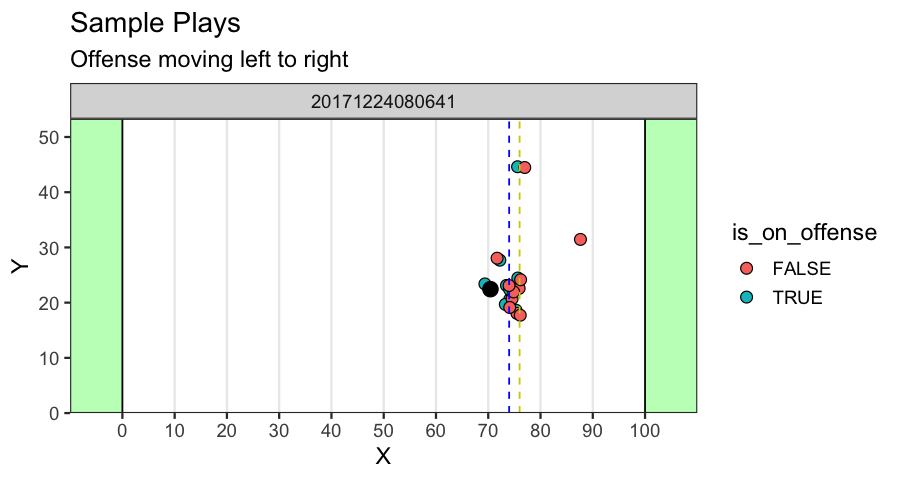

In [24]:
options(repr.plot.width=7.5, repr.plot.height=4, warn = -1)
plot_field(samples)

In [25]:
train_clean %>% filter(PlayId %in% samples, IsBallCarrier)

GameId,PlayId,Team,X,Y,S,A,Dis,Orientation,Dir,NflId,DisplayName,JerseyNumber,Season,YardLine,Quarter,GameClock,PossessionTeam,Down,Distance,FieldPosition,HomeScoreBeforePlay,VisitorScoreBeforePlay,NflIdRusher,OffenseFormation,OffensePersonnel,DefendersInTheBox,DefensePersonnel,PlayDirection,TimeHandoff,TimeSnap,Yards,PlayerHeight,PlayerWeight,PlayerBirthDate,PlayerCollegeName,Position,HomeTeamAbbr,VisitorTeamAbbr,Week,Stadium,Location,StadiumType,Turf,GameWeather,Temperature,Humidity,WindSpeed,WindDirection,ToLeft,IsBallCarrier,team_on_offense,is_on_offense,yards_from_own_goal,X_std,Y_std
<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<time>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dttm>,<dttm>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<lgl>,<lgl>,<chr>,<lgl>,<dbl>,<dbl>,<dbl>
2017122408,20171224080641,away,80.42,22.44,3.2,2.7,0.37,344.82,85.29,2555223,Devontae Booker,23,2017,26,1,04:52:00,DEN,3,2,WAS,0,0,2555223,SINGLEBACK,"1 RB, 1 TE, 3 WR",7,"2 DL, 4 LB, 5 DB",right,2017-12-24 18:26:14,2017-12-24 18:26:12,5,5-11,219,05/27/1992,Utah,RB,WAS,DEN,16,FedExField,"Landover, MD",Outdoor,Grass,Cloudy,43,59,7,NE,FALSE,TRUE,away,TRUE,74,70.42,22.44
